<div class="alert alert-block alert-info">
<ul>
<li>Course: Machine Learning</li>
<li>Project: 01</li>
<li>Team members</li>
<li>Mauro Travieso Pena</li>
<li>Quoc Huy Luong</li>
<li>Ngoc Bao Tran</li>
<ul>
</div>



# Classification with Decision Tree

<div class="alert alert-block alert-info">
In this experiment, we use decision tree to classify the anmie dataset.
<ol>
<li>Clean and Transform Data</li>
<li>Split Training/Testing dataset</li>
<li>Run the model with 3 kind of data: Original data, Normalized data and PCA data</li>
<li>Turning the model based on the learning curve and validation curve
<ol><b>Learning Curve</b>
<li>Using scikit-learn method
#https://scikit-learn.org/stable/modules/learning_curve.html</li>
<li>Our method (we did it, because we want to know how learning curve method works)</li>
</ol>
<ol><b>Validation Curve</b>
<li>Using scikit-learn method
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
<li>Our method (we did it, because we want to know how Validation curve method works)</li>
</ol>
</li>
<li>Grid search CV</li>
<li>Final Evaluation</li>
</ol> 
</div>


# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import import_ipynb 
import functions as myLib
import myPlot as myPlotLib



importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from myPlot.ipynb


# Load data from files

In [2]:
RawData = pd.read_csv('../data/anime.csv')


#### Clean and Transform Data

In [3]:
Cleaned_Data = myLib.myCleanAndTransformData(RawData)
Y_Data = Cleaned_Data['Class']
X_Data = Cleaned_Data.drop(columns=['Class'])


#### Normalize  Data

In [4]:
Normalized_Data = myLib.myNormalize(X_Data)

#### PCA

In [5]:
n_components=10
PCA_Data = myLib.myPCA(Normalized_Data,n_components)
PCA_Data.head()


,0,1,2,3,4,5,6,7,8,9
0,-0.311566,0.786509,-0.420832,0.005210,-0.079352,-0.049281,-0.064353,0.011509,-0.063478,-0.041868
1,-0.284842,0.763991,-0.412007,-0.010869,-0.110071,-0.086872,-0.096757,0.056104,-0.177359,-0.054219
2,-0.284838,0.767910,-0.395565,-0.007540,-0.091557,-0.060479,-0.061162,0.036295,-0.092538,-0.022190
3,-0.291600,0.777175,-0.408310,0.000265,-0.080733,-0.048813,-0.057211,0.019317,-0.071532,-0.027501
4,0.732145,-0.153155,-0.102203,-0.458245,0.816911,0.046091,0.015707,-0.064935,0.013506,-0.004722


####----------------------------------------------------------------
# Decision Tree Classification 
####----------------------------------------------------------------

In [6]:
Y_Data.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [7]:
X_Data.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64,793665,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Normalized_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.034673,0.782769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
PCA_Data.head()


,0,1,2,3,4,5,6,7,8,9
0,-0.311566,0.786509,-0.420832,0.005210,-0.079352,-0.049281,-0.064353,0.011509,-0.063478,-0.041868
1,-0.284842,0.763991,-0.412007,-0.010869,-0.110071,-0.086872,-0.096757,0.056104,-0.177359,-0.054219
2,-0.284838,0.767910,-0.395565,-0.007540,-0.091557,-0.060479,-0.061162,0.036295,-0.092538,-0.022190
3,-0.291600,0.777175,-0.408310,0.000265,-0.080733,-0.048813,-0.057211,0.019317,-0.071532,-0.027501
4,0.732145,-0.153155,-0.102203,-0.458245,0.816911,0.046091,0.015707,-0.064935,0.013506,-0.004722


####----------------------------------------------------------------
#### Split Original Data
####----------------------------------------------------------------

In [10]:
X_train, X_test, y_train, y_test  = myLib.mySplitData(X_Data,Y_Data,0.33,42)

X_train.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
32729,2,132,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24946,2,7051,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8676,50,65896,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13244,52,67936,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29384,15,49,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_test.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
22373,10,3331,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10508,12,28423,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11570,1,5078,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22262,1,390,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
734,15,482268,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [13]:
y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
#### Split Original Normalized_Data
####----------------------------------------------------------------

In [14]:
Normalized_X_train, Normalized_X_test, Normalized_y_train, Normalized_y_test  = myLib.mySplitData(Normalized_Data,Y_Data,0.33,42)

Normalized_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
32729,0.000550,0.000118,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24946,0.000550,0.006942,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8676,0.026968,0.064980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13244,0.028068,0.066992,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29384,0.007705,0.000036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
Normalized_X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
22373,0.004953,0.003273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10508,0.006054,0.028021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11570,0.000000,0.004997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22262,0.000000,0.000373,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
734,0.007705,0.475642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
Normalized_y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [17]:
Normalized_y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
#### Split  PCA_Data
####----------------------------------------------------------------

In [18]:
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test  = myLib.mySplitData(PCA_Data,Y_Data,0.33,42)

PCA_X_train.head()

,0,1,2,3,4,5,6,7,8,9
32729,-0.222553,0.292974,0.905564,-0.156265,-0.108173,-0.030903,-0.021217,0.050130,-0.026671,0.004422
24946,-0.645160,-0.559037,-0.134431,-0.006494,-0.054771,-0.037345,-0.023292,-0.011981,-0.028707,0.004091
8676,0.697664,-0.148216,-0.076753,-0.039158,-0.073670,-0.033267,-0.020510,0.015776,-0.034431,-0.002314
13244,0.704243,-0.156340,-0.072749,-0.051371,-0.099914,-0.052509,-0.031352,0.052393,-0.056520,-0.005660
29384,0.702786,-0.119935,-0.090781,-0.060721,-0.137238,-0.101375,-0.123554,0.070669,-0.320229,0.734838


In [19]:
PCA_X_test.head()

,0,1,2,3,4,5,6,7,8,9
22373,-0.124243,0.125882,0.130238,0.040386,-0.038658,0.016078,0.275019,0.947637,0.305192,-0.024180
10508,0.709170,-0.165194,-0.059529,-0.058811,-0.110818,-0.063838,-0.035146,0.070049,-0.077440,0.000162
11570,-0.303163,0.781798,-0.421074,-0.036558,-0.226336,0.908837,0.064444,-0.182145,0.052453,-0.010893
22262,-0.292557,0.765531,-0.409847,-0.008914,-0.110530,-0.085261,-0.096070,0.059276,-0.176926,-0.051632
734,0.719920,-0.159428,-0.077173,-0.055437,-0.098955,-0.055825,-0.032754,0.045877,-0.057414,-0.011013


In [20]:
PCA_y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [21]:
PCA_y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
# Model Training 
####----------------------------------------------------------------

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

def myDT(clf,X_train,y_train,X_test,y_test,cv):
    #Fit the model
    #The maximum depth of the tree. 
    #If None, then nodes are expanded until all leaves are pure
    # or until all leaves contain less than min_samples_split samples.
    #min_samples_split: by default = 1
    clf.fit(X_train, y_train)
    #check accuracy of model on the train and test data
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    #Using CV
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv)
    return pd.DataFrame({"leaves":[clf.get_n_leaves()],"depth":[clf.get_depth()],"train_score":[train_score],"test_score":[test_score],"cv_score":[cv_scores.mean()]})


In [23]:
def myDT_ModelTurning(clf,depths,X_train,y_train,X_test,y_test,cv):
    df = pd.DataFrame({"depth":[],"train_score":[],"cv_score":[]})
    for depth in depths:
        clf1 = DecisionTreeClassifier(max_depth=depth,random_state=0)
        score_df = myDT(clf1,X_train,y_train,X_test,y_test,cv)
        df = df.append(pd.DataFrame({"depth":depth,"train_score":score_df.train_score,"test_score":score_df.test_score,"cv_score":score_df.cv_score}),ignore_index=True,sort=False)
    
    return df

In [24]:

cv = 10
clf = DecisionTreeClassifier(random_state=0)

In [25]:
#Original Data
scores = myDT(clf,X_train,y_train,X_test,y_test,cv)
scores

,leaves,depth,train_score,test_score,cv_score
0,3763,42,0.993513,0.847465,0.844004


In [26]:
#Normalized Data
scores = myDT(clf,Normalized_X_train,Normalized_y_train,Normalized_X_test,Normalized_y_test,cv)
scores

,leaves,depth,train_score,test_score,cv_score
0,3763,42,0.993513,0.847551,0.843877


In [27]:
#PCA Data
scores = myDT(clf,PCA_X_train,PCA_y_train,PCA_X_test,PCA_y_test,cv)
scores


,leaves,depth,train_score,test_score,cv_score
0,4769,47,0.97829,0.760007,0.75547


####----------------------------------------------------------------
# Learning Curve
####----------------------------------------------------------------
#https://scikit-learn.org/stable/modules/learning_curve.html

In [28]:
from sklearn.model_selection import learning_curve
splitsSize = np.linspace(0.04,0.99,20)
splitsSize

array([0.04, 0.09, 0.14, 0.19, 0.24, 0.29, 0.34, 0.39, 0.44, 0.49, 0.54,
       0.59, 0.64, 0.69, 0.74, 0.79, 0.84, 0.89, 0.94, 0.99])

In [29]:
train_sizes, train_scores, test_scores = learning_curve(
        clf, X_Data, Y_Data, cv=cv, n_jobs=1, train_sizes=splitsSize)

In [30]:
train_sizes

array([ 1267,  2851,  4435,  6019,  7603,  9187, 10771, 12355, 13939,
       15523, 17107, 18691, 20275, 21859, 23443, 25027, 26611, 28195,
       29779, 31363])

In [31]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.       

In [32]:
test_scores

array([[0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.64385118, 0.64375   , 0.64375   ,
        0.64375   , 0.64375   , 0.64375   , 0.64393294, 0.64393294],
       [0.64385118, 0.64385118, 0.6438511

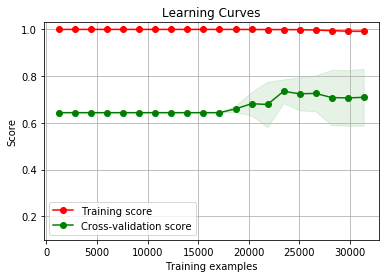

In [33]:
title = "Learning Curves"
myPlotLib.plot_learning_curve(clf, title, X_Data, Y_Data, ylim=(0.1, 1.03),train_sizes=splitsSize, cv=cv, n_jobs=4)
plt.show()


In [34]:
def myDT_LearningCurve(clf,X_Data,Y_Data,splits,cv):
    df = pd.DataFrame({"percent":[],"train_score":[],"test_score":[],"cv_score":[]})
    for X in splits:
        X_train, X_test, y_train, y_test  = myLib.mySplitDataByTrainSize(X_Data,Y_Data,X,42)
        score_df = myDT(clf,X_train,y_train,X_test,y_test,cv)
        df = df.append(pd.DataFrame({"percent":X,"train_score":score_df.train_score,"test_score":score_df.test_score,"cv_score":score_df.cv_score}),ignore_index=True,sort=False)
    return df


In [35]:
learning_df= myDT_LearningCurve(clf,X_Data,Y_Data,splitsSize,cv)
learning_df

,percent,train_score,test_score,cv_score
0,0.04,1.000000,0.724731,0.735879
1,0.09,1.000000,0.750478,0.752615
2,0.14,0.997576,0.755993,0.778256
3,0.19,0.999330,0.764493,0.777005
4,0.24,0.998057,0.785509,0.778453
5,0.29,0.997076,0.772930,0.783754
6,0.34,0.996633,0.796203,0.776758
7,0.39,0.996086,0.800044,0.789173
8,0.44,0.995663,0.796166,0.795974
9,0.49,0.995760,0.810436,0.796295


In [36]:
learning_df.describe()

,percent,train_score,test_score,cv_score
count,20.000000,20.000000,20.000000,20.000000
mean,0.515000,0.996059,0.801782,0.799441
std,0.295804,0.002017,0.033617,0.028517
min,0.040000,0.993589,0.724731,0.735879
25%,0.277500,0.994678,0.782364,0.778404
50%,0.515000,0.995476,0.809410,0.797996
75%,0.752500,0.997201,0.829208,0.823851
max,0.990000,1.000000,0.844597,0.841785


Text(0.5, 1.0, 'Learning Curve of CV:10')

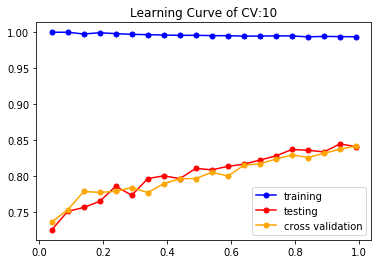

In [37]:

fig, ax = plt.subplots()
plt.plot(learning_df.percent, learning_df.train_score, color='blue', marker='o', markersize=5, label='training')

plt.plot(learning_df.percent, learning_df.test_score, color='red', marker='o', markersize=5, label='testing')

plt.plot(learning_df.percent, learning_df.cv_score, color='orange', marker='o', markersize=5, label='cross validation')

ax.legend()
ax.set_title("Learning Curve of CV:10")


<div class="alert alert-block alert-danger">
Based on the Learning Curve, we saw that 
<ul>
<li>Very small samples dataset has high variance. It means the model perfomrs very well on training data (<b>min = 0.993589</b>), but has high erro rates on the test data (<b>min = 0.724731</b>)</li>
<li>Adding more training samples (<b>>25K</b>) may not affect the accuracy of the model</li>
</ul>

That means, the best value of the depth < <b>50</b>, we will do grid search CV based on this range  
</div>


####----------------------------------------------------------------
# Validation Curve
####----------------------------------------------------------------

In [38]:
depths = [1,2,4, 5, 8,10,15, 20,25,30,35,40,50,60,70,80,90,100,150,200]

In [39]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(),X_train, y_train, 
    param_name="max_depth", param_range=depths,
    cv=cv, n_jobs=1)


In [40]:
train_scores

array([[0.76126084, 0.7623086 , 0.76122497, 0.76161312, 0.76095355,
        0.76133044, 0.76151889, 0.76217846, 0.761566  , 0.75949307],
       [0.78929514, 0.79005889, 0.79081272, 0.78945633, 0.78997456,
        0.79021012, 0.79086969, 0.79105814, 0.79025723, 0.7881843 ],
       [0.80785903, 0.80706714, 0.80805654, 0.80655799, 0.80599265,
        0.80731179, 0.80495619, 0.80669933, 0.80594554, 0.80439084],
       [0.81073313, 0.80881037, 0.80923439, 0.80924338, 0.80900782,
        0.81027985, 0.80641666, 0.80919627, 0.80848959, 0.80759446],
       [0.82755371, 0.82704358, 0.82723204, 0.82582682, 0.82625082,
        0.82921888, 0.82215208, 0.82719307, 0.82450768, 0.82714595],
       [0.84767245, 0.84579505, 0.84744405, 0.84542542, 0.8449543 ,
        0.84919438, 0.83991331, 0.84509564, 0.84537831, 0.84570809],
       [0.90284583, 0.90054181, 0.90699647, 0.8997456 , 0.90360878,
        0.90228964, 0.89032319, 0.89753133, 0.89470461, 0.89927447],
       [0.94591029, 0.95020024, 0.9532626

In [41]:
valid_scores


array([[0.76016949, 0.75074184, 0.76049173, 0.75699746, 0.76293469,
        0.75954198, 0.77184054, 0.7519084 , 0.75742154, 0.77608142],
       [0.79237288, 0.78550233, 0.78126325, 0.79092451, 0.78880407,
        0.7841391 , 0.79177269, 0.77905004, 0.78625954, 0.80322307],
       [0.80550847, 0.7990674 , 0.80076304, 0.80322307, 0.80364716,
        0.80237489, 0.81552163, 0.79728584, 0.80364716, 0.80746395],
       [0.80847458, 0.80161085, 0.79991522, 0.80661578, 0.80407125,
        0.80703986, 0.81509754, 0.80195081, 0.80958439, 0.80110263],
       [0.81991525, 0.8041543 , 0.80796948, 0.81509754, 0.81212892,
        0.81891433, 0.81933842, 0.80491942, 0.82103478, 0.81594572],
       [0.82245763, 0.80627384, 0.80457821, 0.82442748, 0.81679389,
        0.8235793 , 0.82951654, 0.80746395, 0.8235793 , 0.82442748],
       [0.84576271, 0.83255617, 0.8088173 , 0.84139101, 0.83333333,
        0.84223919, 0.83969466, 0.82188295, 0.82782019, 0.82951654],
       [0.85      , 0.84145825, 0.8304366

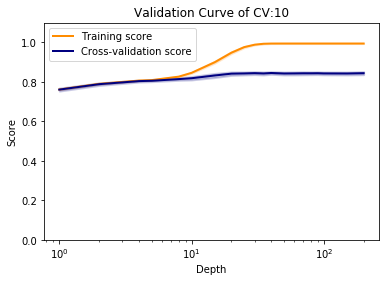

In [42]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve of CV:10")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(depths, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(depths, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(depths, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(depths, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


####----------------------------------------------------------------
# Model Turning
####----------------------------------------------------------------

In [43]:
learnig_df= myDT_ModelTurning(clf,depths,X_train,y_train,X_test,y_test,cv)
learnig_df

,depth,train_score,cv_score,test_score
0,1.0,0.761152,0.760813,0.771197
1,2.0,0.789858,0.788331,0.788414
2,4.0,0.805758,0.803850,0.808212
3,5.0,0.808302,0.805546,0.810106
4,8.0,0.824669,0.813815,0.815959
5,10.0,0.844428,0.818522,0.818714
6,15.0,0.897346,0.832047,0.833950
7,20.0,0.942503,0.840782,0.843075
8,25.0,0.971549,0.843368,0.847723
9,30.0,0.988382,0.843580,0.848067


In [44]:
learnig_df.describe()

,depth,train_score,cv_score,test_score
count,20.000000,20.000000,20.000000,20.000000
mean,49.750000,0.928388,0.829550,0.832853
std,53.155061,0.086843,0.023673,0.022938
min,1.000000,0.761152,0.760813,0.771197
25%,9.500000,0.839489,0.817345,0.818025
50%,32.500000,0.990332,0.843623,0.846948
75%,72.500000,0.993513,0.844004,0.847465
max,200.000000,0.993513,0.844640,0.848067


Text(0.5, 1.0, 'Training and Cross validation scores of CV:10')

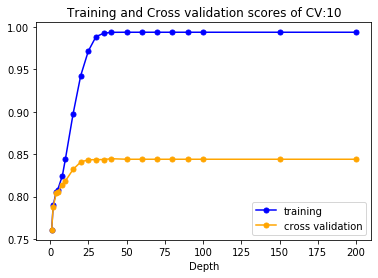

In [45]:

fig,ax = plt.subplots()
plt.xlabel("Depth")
plt.plot(learnig_df.depth, learnig_df.train_score, color='blue', marker='o', markersize=5, label='training')
plt.plot(learnig_df.depth, learnig_df.cv_score, color='orange', marker='o', markersize=5, label='cross validation')

ax.legend()
ax.set_title("Training and Cross validation scores of CV:10")


<div class="alert alert-block alert-danger">
Based on the Validation Curve, we saw that with the depth > <b>50</b>, 
<ul>
<li>The training scores almost are the same: <b>0.993513</b> </li>
<li>The cross validation scores almost are the same: <b>0.844004</b> </li>
</ul>
That means, the best value of the depth < <b>50</b>, we will do grid search CV based on this range  
</div>


####----------------------------------------------------------------
# Grid Search CV
####----------------------------------------------------------------

In [46]:
#GridSearchCV
def myGS(X_train,y_train,depths,num_leafs):
    from sklearn.model_selection import GridSearchCV
    
    param_grid = [{'max_depth':depths,
                  'min_samples_leaf':num_leafs}]
    clf2 = DecisionTreeClassifier(random_state=0)
    gs = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=10)
    
    gs = gs.fit(X_train, y_train)
    return gs
    

In [47]:
depths = range(10,50,20)
num_leafs = [1,2,4, 5, 8, 10, 20]
gs = myGS(X_train,y_train,depths,num_leafs)
#Training Score
gs.best_score_

0.8589721845318861

In [48]:
gs.best_params_
    

{'max_depth': 30, 'min_samples_leaf': 2}

####----------------------------------------------------------------
# Final Evaluation
####----------------------------------------------------------------

In [49]:
clf = DecisionTreeClassifier(random_state=0,max_depth=gs.best_params_['max_depth'],min_samples_leaf=gs.best_params_['min_samples_leaf'])
#Original Data
scores = myDT(clf,X_train,y_train,X_test,y_test,cv)
scores


,leaves,depth,train_score,test_score,cv_score
0,2876,30,0.95162,0.86141,0.858972


<div class="alert alert-block alert-warning">
The accuracy of the model (Orignal Data): <b>0.86141</b> 
</div>


####----------------------------------------------------------------
# ROC Curve
####----------------------------------------------------------------

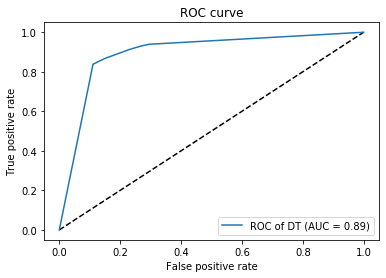

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc

dt_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)
dt_lm.fit(X_test, y_test)

y_pred_dt = clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr_dt, tpr_dt)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label='ROC of DT (AUC = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()